In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Amazon_reviews_processed.csv')
df.head(2)

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,bought several vitality canned dog food produc...,21,3,0,0,1,23,164,6.2
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not as advertised,product arrived labeled jumbo salted peanutsth...,12,7,0,0,0,18,136,6.6


**Cleaning Outliers** 

In [ ]:
df.describe().round(0)

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word
count,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0,568411.0
mean,284227.0,2.0,2.0,4.0,32.0,17.0,0.0,0.0,3.0,41.0,269.0,6.0
std,164099.0,8.0,8.0,1.0,32.0,25.0,0.0,1.0,6.0,43.0,281.0,1.0
min,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0
25%,142114.0,0.0,0.0,4.0,13.0,5.0,0.0,0.0,1.0,17.0,110.0,5.0
50%,284224.0,0.0,1.0,5.0,23.0,10.0,0.0,0.0,2.0,29.0,184.0,6.0
75%,426342.0,2.0,2.0,5.0,40.0,20.0,0.0,0.0,4.0,50.0,323.0,6.0
max,568454.0,866.0,923.0,5.0,1295.0,2035.0,34.0,32.0,334.0,1977.0,14782.0,10.0


## Data Cleaning: Deduplication

It is observed (as shown in the table below) that the reviews data had many duplicate entries. Hence it was necessary to remove duplicates in order to get unbiased results for the analysis of the data.  Following is an example:

In [ ]:
display = df.query(f'Score != 3 and UserId=="AR5J8UI46CURR" ') 
display.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word
73784,73791,B000HDOPZG,AR5J8UI46CURR,2,2,5,2008-01-06,loacker quadratini vanilla wafers,delicious wafers find european wafers less swe...,0,4,0,0,17,11,84,6.7
78438,78445,B000HDL1RQ,AR5J8UI46CURR,2,2,5,2008-01-06,loacker quadratini vanilla wafers,delicious wafers find european wafers less swe...,0,4,0,0,17,11,84,6.7
138265,138277,B000HDOPYM,AR5J8UI46CURR,2,2,5,2008-01-06,loacker quadratini vanilla wafers,delicious wafers find european wafers less swe...,0,4,0,0,17,11,84,6.7
138305,138317,B000HDOPYC,AR5J8UI46CURR,2,2,5,2008-01-06,loacker quadratini vanilla wafers,delicious wafers find european wafers less swe...,0,4,0,0,17,11,84,6.7
155037,155049,B000PAQ75C,AR5J8UI46CURR,2,2,5,2008-01-06,loacker quadratini vanilla wafers,delicious wafers find european wafers less swe...,0,4,0,0,17,11,84,6.7


As can be seen above the same user has multiple reviews of the with the same values for HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary and Text  and on doing analysis it was found that <br>
<br> 
ProductId=B000HDOPZG was Loacker Quadratini Vanilla Wafer Cookies, 8.82-Ounce Packages (Pack of 8)<br>
<br> 
ProductId=B000HDL1RQ was Loacker Quadratini Lemon Wafer Cookies, 8.82-Ounce Packages (Pack of 8) and so on<br>

It was inferred after analysis that reviews with same parameters other than ProductId belonged to the same product just having different flavour or quantity. Hence in order to reduce redundancy it was decided to eliminate the rows having same parameters.<br>

The method used for the same was that we first sort the data according to ProductId and then just keep the first similar product review and delelte the others. for eg. in the above just the review for ProductId=B000HDL1RQ remains. This method ensures that there is only one representative for each product and deduplication without sorting would lead to possibility of different representatives still existing for the same product.

In [ ]:
#Sorting data according to ProductId in ascending order
data = df.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [ ]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'stopwords', 'punctuation', 'hastags', 'numerics', 'upper',
       'word_count', 'char_count', 'avg_word'],
      dtype='object')

In [ ]:
#Deduplication of entries
data = data.drop_duplicates(subset={"UserId","Time","Text"}, keep='first', inplace=False)
data.shape

(393443, 17)

<b>Observation:-</b> It was also seen that in two rows given below the value of HelpfulnessNumerator is greater than HelpfulnessDenominator which is not practically possible hence these two rows too are removed from calcualtions

In [ ]:
display = data.query(f'Score != 3 and Id==44737 or Id==64422 ') 
display.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word
64416,64422,B000MIDROQ,A161DK06JJMCYF,3,1,5,2008-10-25,bought this for my son at college,son loves spaghetti didnt hesitate ordering sa...,42,9,0,0,2,36,235,5.6
44732,44737,B001EQ55RW,A2V0I904FH7ABY,3,2,4,2008-06-08,pure cocoa taste with crunchy almonds inside,almost love first bite perfectly roasted almon...,74,47,0,0,0,96,612,5.4


Now, let's check latest condition of the dataset because we have dropped many values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393441 entries, 150481 to 327577
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      393441 non-null  int64  
 1   ProductId               393441 non-null  object 
 2   UserId                  393441 non-null  object 
 3   HelpfulnessNumerator    393441 non-null  int64  
 4   HelpfulnessDenominator  393441 non-null  int64  
 5   Score                   393441 non-null  int64  
 6   Time                    393441 non-null  object 
 7   Summary                 393110 non-null  object 
 8   Text                    393440 non-null  object 
 9   stopwords               393441 non-null  int64  
 10  punctuation             393441 non-null  int64  
 11  hastags                 393441 non-null  int64  
 12  numerics                393441 non-null  int64  
 13  upper                   393441 non-null  int64  
 14  word_count     

### Distribution of Scores

Text(0.5, 1.0, 'Distribution of Scores')

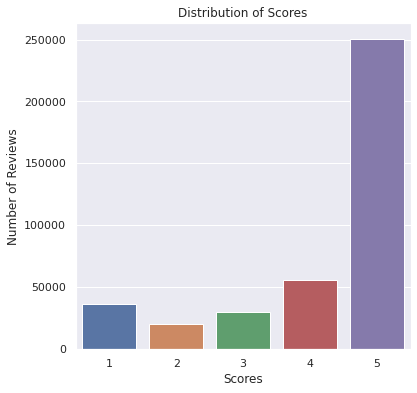

In [ ]:
a = data.groupby(['Score'])['Id'].count()
a = a.reset_index()
a = a.rename(columns={'Id': 'Number of Reviews'})
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x='Score', y='Number of Reviews', data=a)
plt.xlabel("Scores")
plt.ylabel('Number of Reviews')
plt.title('Distribution of Scores')

Most of the reviews are 5 stars. This is an unbalanced distribution.


---



---



### Number of Characters in Reviews

150514    138
150485    295
171169    167
171166    159
76883     241
         ... 
500169    104
68911      93
271293    155
38509     116
146362    170
Name: Text, Length: 36207, dtype: int64


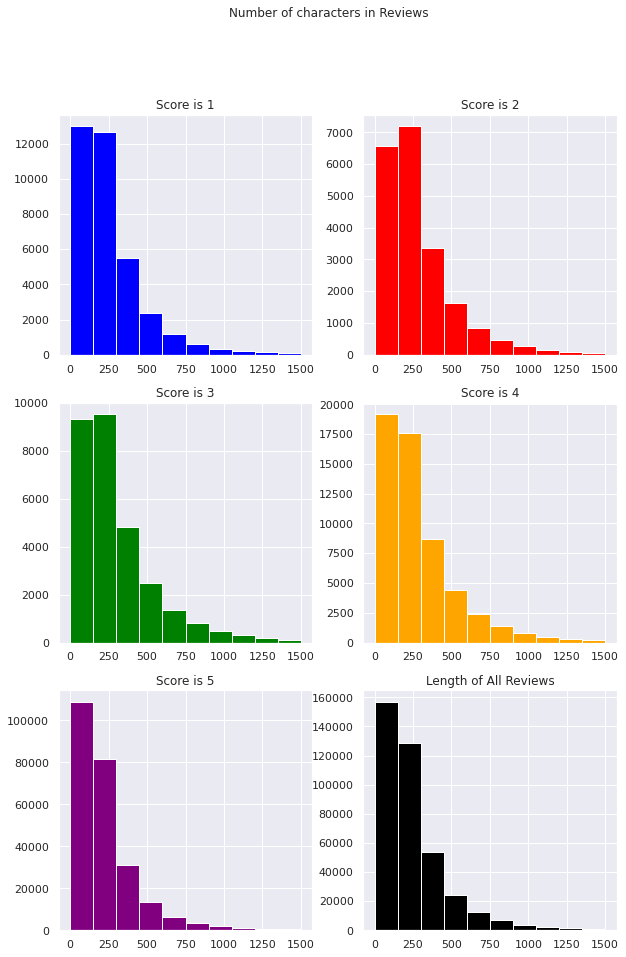

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(10, 15))

#Score 1
review_len = data.loc[data['Score']==1]['Text'].str.len()
print(review_len)
axs[0,0].hist(review_len, color='blue', range=(0,1500))
axs[0,0].set_title('Score is 1')

#Score 2
review_len = data.loc[data['Score']==2]['Text'].str.len()
axs[0,1].hist(review_len, color='red',range=(0,1500))
axs[0,1].set_title('Score is 2')

#Score 3
review_len = data.loc[data['Score']==3]['Text'].str.len()
axs[1,0].hist(review_len, color='green', range=(0,1500))
axs[1,0].set_title('Score is 3')

#Score 4
review_len = data.loc[data['Score']==4]['Text'].str.len()
axs[1,1].hist(review_len, color='orange', range=(0,1500))
axs[1,1].set_title('Score is 4')


#Score 5
review_len = data.loc[data['Score']==5]['Text'].str.len()
axs[2,0].hist(review_len, color='purple', range=(0,1500))
axs[2,0].set_title('Score is 5')

#All Scores
review_len = data['Text'].str.len()
axs[2,1].hist(review_len, color='black', range=(0,1500))
axs[2,1].set_title('Length of All Reviews')


fig.suptitle('Number of characters in Reviews')

plt.show()

#### After this point, I will convert 'Score' to a binary feature.

*   Score values 1, 2 and 3 will be coded as 0 (zero)
*   Score values 4 and 5 will be coded as 1





In [ ]:
data['Good_reviews'] = data.Score
data.Good_reviews[data.Score <= 3] = 0
data.Good_reviews[data.Score >= 4] = 1

Text(0.5, 1.0, 'Distribution of Good Reviews')

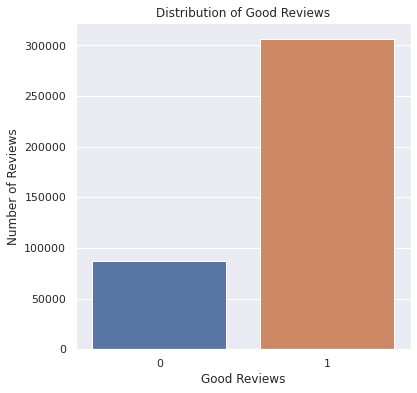

In [ ]:
a = data.groupby(['Good_reviews'])['Id'].count()
a = a.reset_index()
a = a.rename(columns={'Id': 'Number of Reviews'})
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x='Good_reviews', y='Number of Reviews', data=a)
plt.xlabel("Good Reviews")
plt.ylabel('Number of Reviews')
plt.title('Distribution of Good Reviews')

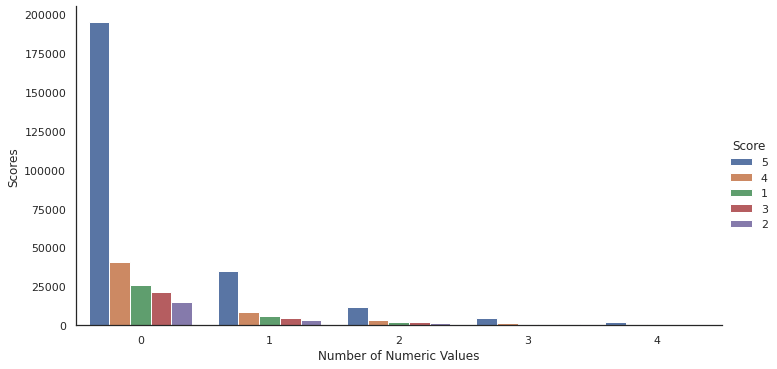

In [ ]:
# Now, let's take a look at the Number of Words number for tweets

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'numerics', data= data.loc[data.numerics <= 4], aspect= 2, kind='count', 
                    hue='Score', hue_order=data['Score'].value_counts().sort_values(ascending=False).index)
    g.set_ylabels('Scores')
    g.set_xlabels('Number of Numeric Values')
    g.set_titles('Distrubition of Number of Numeric values for Reviews')

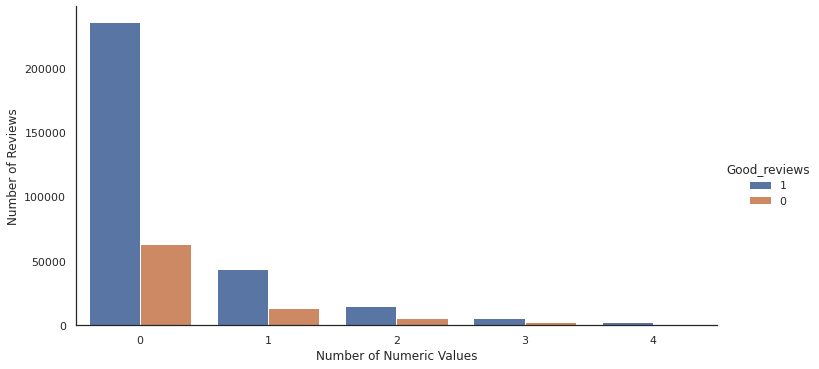

In [ ]:
# Now, let's take a look at the Number of Words number for Reviews

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'numerics', data= data.loc[data.numerics <= 4], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=data['Good_reviews'].value_counts().sort_values(ascending=False).index)
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Number of Numeric Values')
    g.set_titles('Distrubition of Number of Numeric values for Reviews')

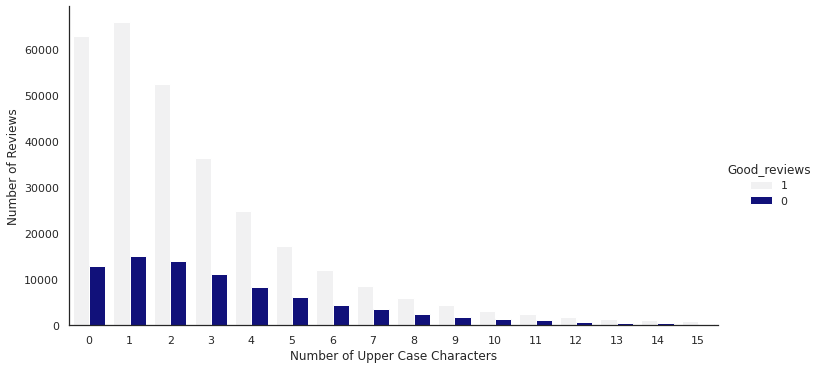

In [ ]:
# Now, let's take a look at the number of upper sase characters for reviews

# I will take max upper= 20

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'upper', data= data.loc[data.upper <= 15], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=data['Good_reviews'].value_counts().sort_values(ascending=False).index, color= 'DarkBlue')
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Number of Upper Case Characters')
    g.set_titles('Distrubition of Number of Upper Case Characters for Reviews')

#####Let's check  HelpfulnessNumerator vs Good_reviews 

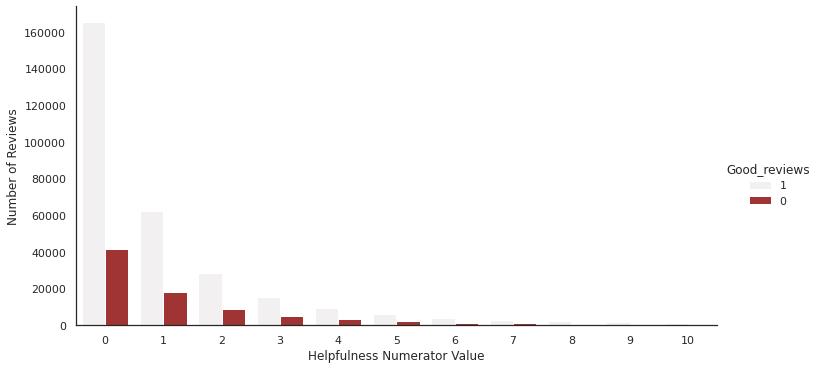

In [ ]:
# Now, let's take a look at the number of upper sase characters for reviews

# I will take max upper= 20

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'HelpfulnessNumerator', data= data.loc[data.HelpfulnessNumerator <= 10], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=data['Good_reviews'].value_counts().sort_values(ascending=False).index, color = 'Firebrick')
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Helpfulness Numerator Value')
    g.set_titles('Distrubition of HelpfulnessNumerator for Reviews')

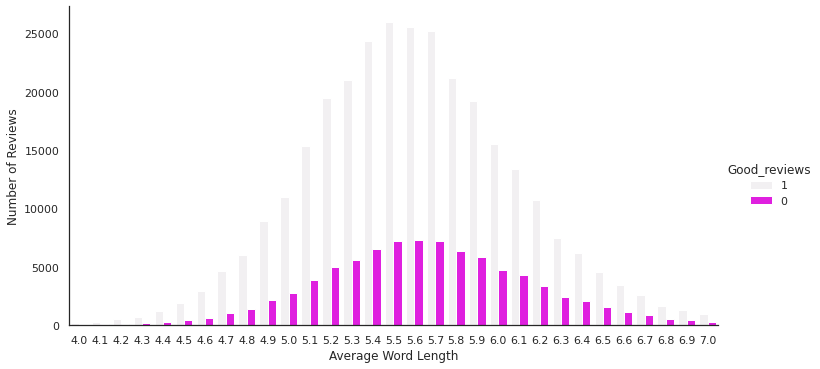

In [ ]:
#Average Word Length

# Now, let's take a look at the number of upper sase characters for reviews

# I will take max upper= 20

#plt.figure(figsize=(12,10), dpi= 100 )
#sns.set(font_scale=1)

with sns.axes_style('white'):
    g = sns.catplot( 'avg_word', data= data.loc[(data.avg_word <= 7) & (data.avg_word >= 4)], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=data['Good_reviews'].value_counts().sort_values(ascending=False).index, color = 'Magenta')
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Average Word Length')
    g.set_titles('Distribution of HelpfulnessNumerator for Reviews')

As we can see from the plot, the distributions are normal distribution for both good and bad reviews

In [ ]:
data['Time']= pd.to_datetime(data.Time)

Text(0.5, 1.0, 'Mean Revies Scores - Monthly')

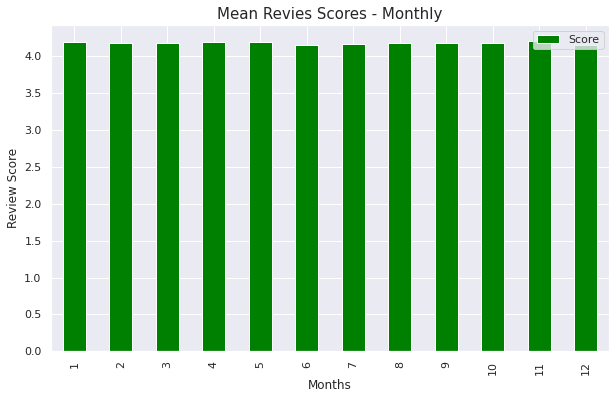

In [ ]:
data[['Score']].groupby(data["Time"].dt.month).mean().plot(kind="bar", figsize= (10,6), color ='green')
plt.xlabel('Months')
plt.ylabel('Review Score')
plt.title('Mean Revies Scores - Monthly', fontsize=15)

Text(0.5, 1.0, 'Mean Reviews Scores - Monthly')

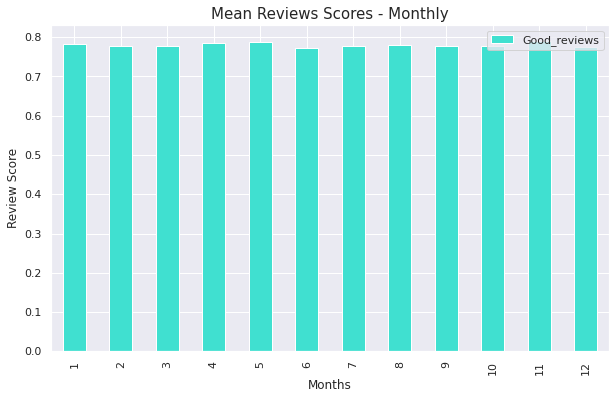

In [ ]:
data[['Good_reviews']].groupby(data["Time"].dt.month).mean().plot(kind="bar", figsize= (10,6), color ='turquoise')
plt.xlabel('Months')
plt.ylabel('Review Score')
plt.title('Mean Reviews Scores - Monthly', fontsize=15)

As we can see here, month doesn't have a visible affect on score. All of them over 4 out of 5.

##### Let's check historic distribution of total number of scores

Text(0.5, 1.0, 'Number of Reviews in Time')

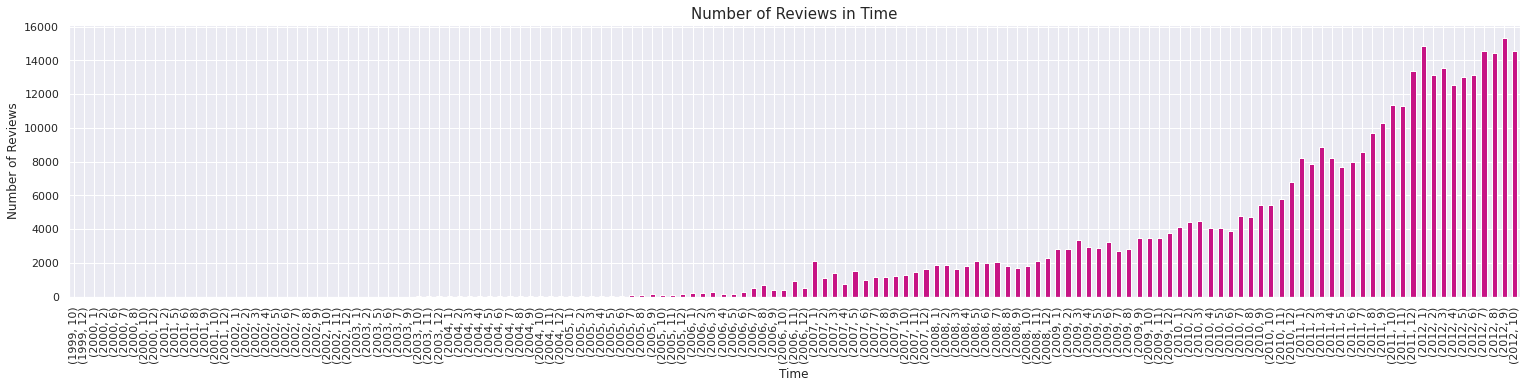

In [ ]:
data.Score.groupby([data["Time"].dt.year, data["Time"].dt.month]).count().plot(kind="bar", figsize=(26,5), color = 'mediumvioletred')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Time', fontsize=15)

Text(0.5, 1.0, 'Number of Reviews in Time')

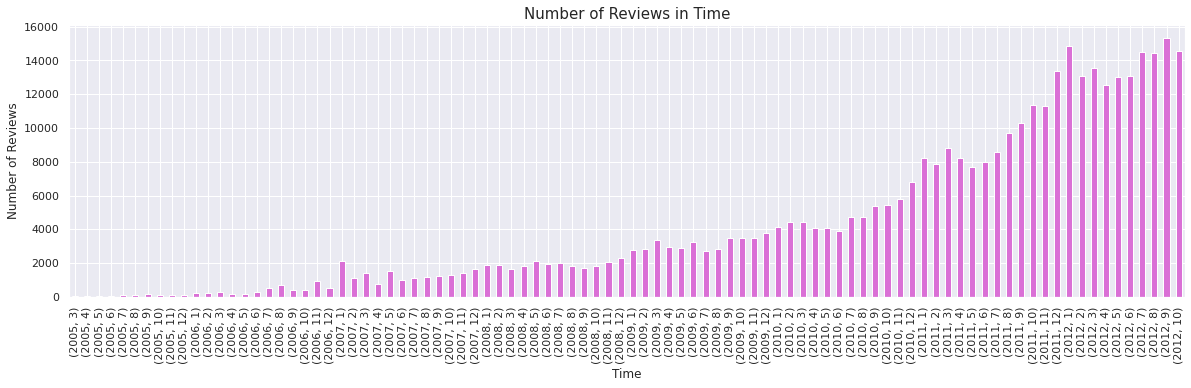

In [ ]:
a= data.loc[data.Time > '03-01-2005']
a.Score.groupby([data["Time"].dt.year, data["Time"].dt.month]).count().plot(kind="bar", figsize=(20,5), color = 'orchid')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews in Time', fontsize=15)

Let's create this same plot with different tool

In [ ]:
import plotly.graph_objects as go
import datetime

fig = go.Figure(data=[go.Bar(y =data.Score.groupby([data["Time"].dt.year, data["Time"].dt.month]).count())])
fig.update_layout(title_text='Time Series for Total Number of Scores with Rangeslider',
                  xaxis_rangeslider_visible=True)

##### Mean of the Scores over the time

It looks like something happened in (2005,05) and mean of the reviews never saw the value of 5 after this date.

Text(0.5, 1.0, 'Average Good Review Distribution of Reviews in Time')

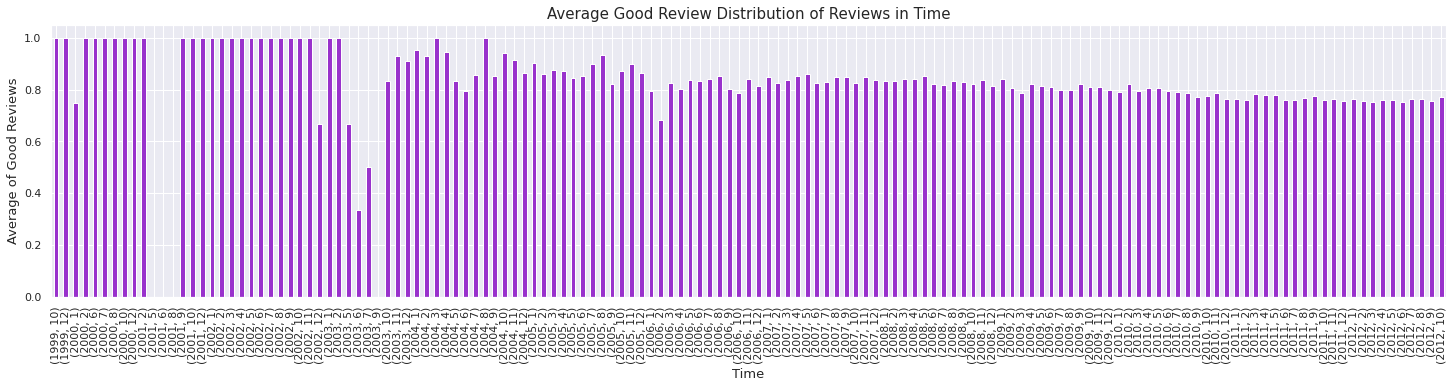

In [ ]:
#Same graph for Good_reviews feature

data.Good_reviews.groupby([data["Time"].dt.year, data["Time"].dt.month]).mean().plot(kind="bar", figsize=(25,5), color = 'Darkorchid')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Average of Good Reviews', fontsize=13)
plt.title('Average Good Review Distribution of Reviews in Time', fontsize=15)

In [ ]:
data.to_csv('/content/drive/MyDrive/Amazon_reviews_cleaned_finalform.csv', index=False)

In [ ]:
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#Libraries for visualization
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

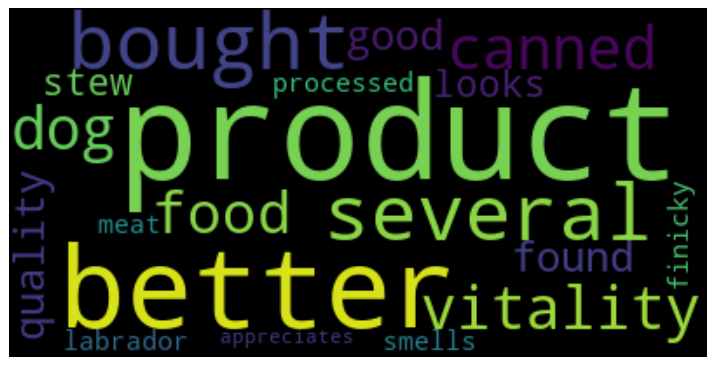

In [ ]:
# Start with one review:
abc = data.Text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(abc)

# Display the generated image:
figure(figsize= (10,10), dpi= 90)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data['Text']= data['Text'].astype(str)

In [ ]:
#Word cloud for the all reviews
text_for_cloud = " ".join(x for x in data.Text)
print ("There are {} words in the combination of all reviews.".format(len(text_for_cloud)))

There are 104148787 words in the combination of all reviews.


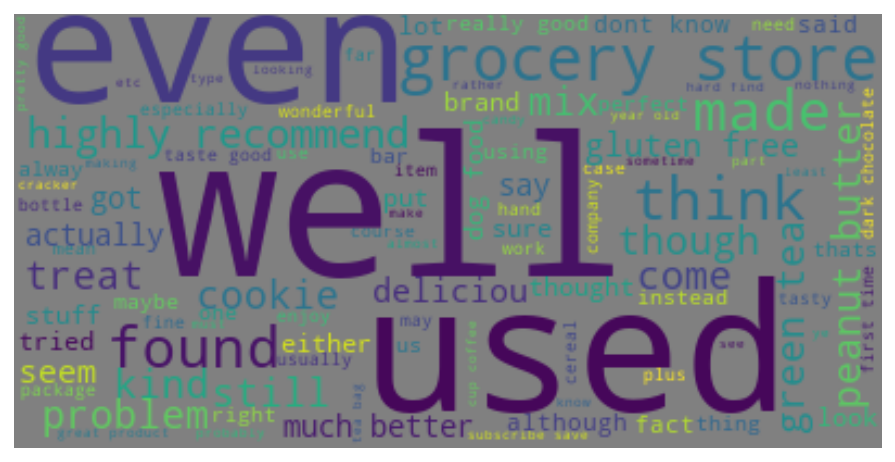

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="grey", max_words= 100).generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
figure(figsize= (8,8), dpi= 140)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()